In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime
import datetime

import ipywidgets

%matplotlib widget
import numpy as np

In [2]:
oil= pd.read_excel("Data/BrentEU.xls")

oil = oil[['Day','OilPrice']]
oil['Month'] = pd.to_datetime(oil["Day"]).dt.strftime('%Y-%m')
oil = oil.groupby('Month').median()


#oil = oil.set_index('Month')
oil.index = pd.to_datetime(oil.index)
#oil = oil.resample('1M').mean()
#df.Price = df.Price.str.replace(',', '')
oil.OilPrice = oil.OilPrice.astype(float)
oil = oil.loc['1997-10-01':'2022-09-01']
oil

,OilPrice
Month,
1997-10-01,19.63
1997-11-01,19.14
1997-12-01,17.09
1998-01-01,15.29
1998-02-01,14.03
...,...
2022-05-01,113.22
2022-06-01,122.21
2022-07-01,111.51


In [3]:
energy_df = pd.read_csv("Data/EnergyIndex.csv")

energy_df =  energy_df.set_index('DATE')
energy_df.index = pd.to_datetime(energy_df.index,format='%Y/%m/%d')
energy_df = energy_df.loc['1997-10-01':'2022-09-01']
energy_df

,Price
DATE,
1997-10-01,53.429404
1997-11-01,51.295632
1997-12-01,46.373656
1998-01-01,42.128222
1998-02-01,40.329750
...,...
2022-05-01,306.674979
2022-06-01,328.123480
2022-07-01,343.809997


In [4]:
gas = pd.read_csv("Data/NaturalGas.csv")

gas =  gas.set_index('DATE')
gas.index = pd.to_datetime(gas.index,format='%Y/%m/%d')
gas = gas.loc['1997-10-01':'2022-09-01']
gas

,PNGASEUUSDM
DATE,
1997-10-01,2.450000
1997-11-01,2.450000
1997-12-01,2.450000
1998-01-01,2.490000
1998-02-01,2.490000
...,...
2022-05-01,27.464166
2022-06-01,32.912607
2022-07-01,51.145913


In [5]:
df =  pd.concat([energy_df,oil, gas], axis=1)
df = df.rename(columns={'Price': 'EnergyPrice', 'PNGASEUUSDM': 'GasPrice'})
df


,EnergyPrice,OilPrice,GasPrice
1997-10-01,53.429404,19.63,2.450000
1997-11-01,51.295632,19.14,2.450000
1997-12-01,46.373656,17.09,2.450000
1998-01-01,42.128222,15.29,2.490000
1998-02-01,40.329750,14.03,2.490000
...,...,...,...
2022-05-01,306.674979,113.22,27.464166
2022-06-01,328.123480,122.21,32.912607
2022-07-01,343.809997,111.51,51.145913
2022-08-01,376.412083,99.68,69.977239


In [8]:
cols = ['EnergyPrice', 'OilPrice','GasPrice']

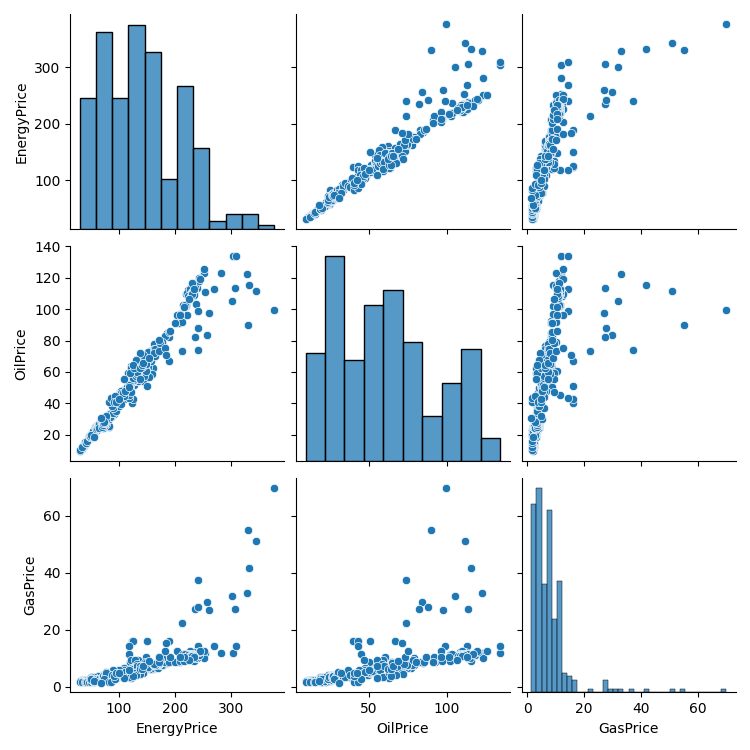

In [9]:
sns.pairplot(df[cols])

In [77]:
df_corr = df[cols].corr()
df_corr[['EnergyPrice']].style.background_gradient(cmap='Reds')

,EnergyPrice
EnergyPrice,1.000000
OilPrice,0.959668
GasPrice,0.759792
